# Image Thresholding and Region Growing
## Image Thresholding

This section follows the OpenCV tutorial https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

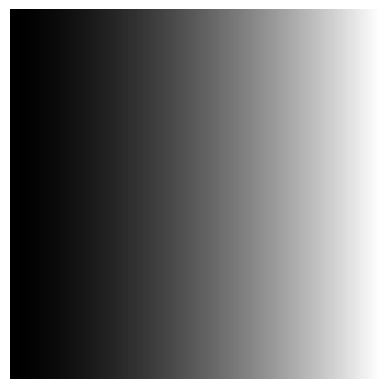

In [1]:
#Creating an image with a gradient
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def f(j):
    return np.power(j, 3/2)

m = 400
col = (f(np.arange(m+1)/m)*255).astype(np.uint8)
im = np.tile(col,(m+1,1))
plt.imshow(im, cmap='gray')
ax = plt.axis('off')

### Global Thresholding

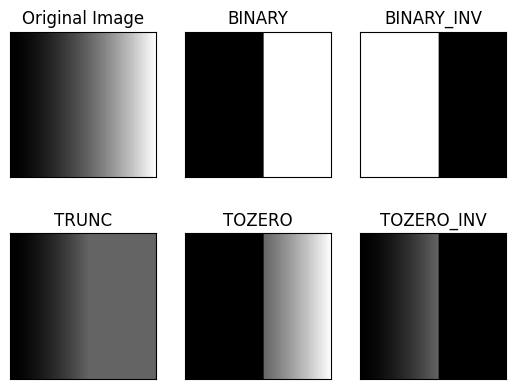

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

threshold = 100

ret,thresh1 = cv.threshold(im,threshold,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(im,threshold,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(im,threshold,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(im,threshold,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(im,threshold,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [im, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Adaptive Thresholding

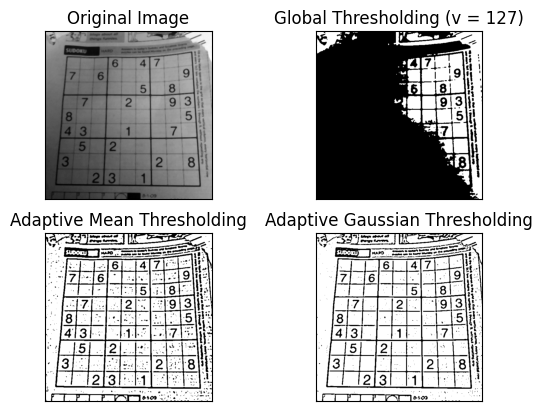

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('./images/sudoku.png',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Adaptive Thresholding without the `adaptiveThreshold` Function

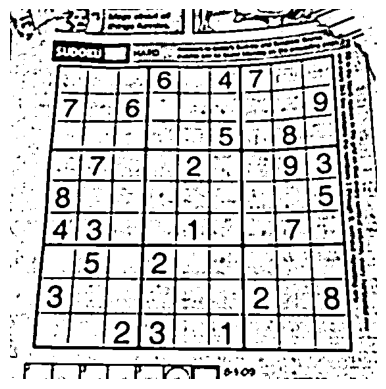

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('./images/sudoku.png',0)
img = cv.medianBlur(img,5)

w = 11
c = 2

kernel = 1/(w*w)*np.ones((w,w)) # Averaging kernel
avg = cv.filter2D(img, -1, kernel )

th = img > avg - c
plt.imshow(th, cmap='gray')

ax = plt.axis('off')

### Adaptive Thresholding Fails for a Shaded Region

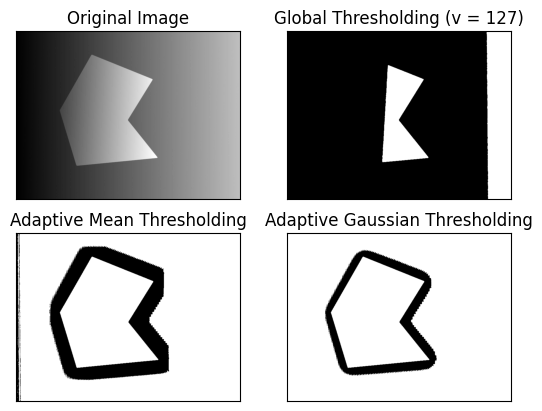

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('./images/shadedobj.png',0)
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,101,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,101,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Image Generation for Otsu's Demo

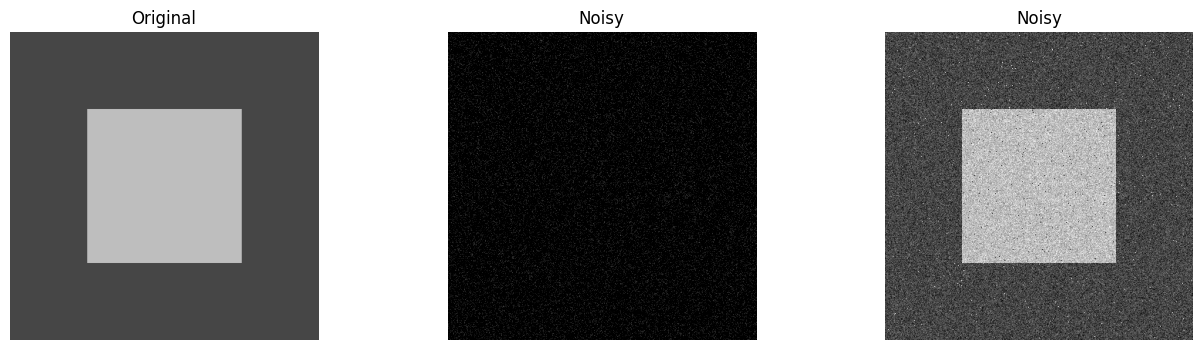

In [6]:
mu = 0.
sigma = 25.
m = 400
r = 200

imo = (np.ones((m, m))*70)
imo[100:300, 100:300] = 190

noise = np.random.normal(mu,sigma,imo.shape)
noise = noise.reshape(imo.shape)

imn = cv.addWeighted(imo, 1, noise, 1, 0).astype(np.uint8)

fig, ax = plt.subplots(1, 3, figsize=(16,4))

ax[0].imshow(imo, cmap='gray', vmin=0, vmax=255), ax[0].title.set_text('Original')
ax[1].imshow(noise, cmap='gray', vmin=0, vmax=255), ax[1].title.set_text('Noisy')
ax[2].imshow(imn, cmap='gray', vmin=0, vmax=255), ax[2].title.set_text('Noisy')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

plt.show()

### Otsu's Thresholding

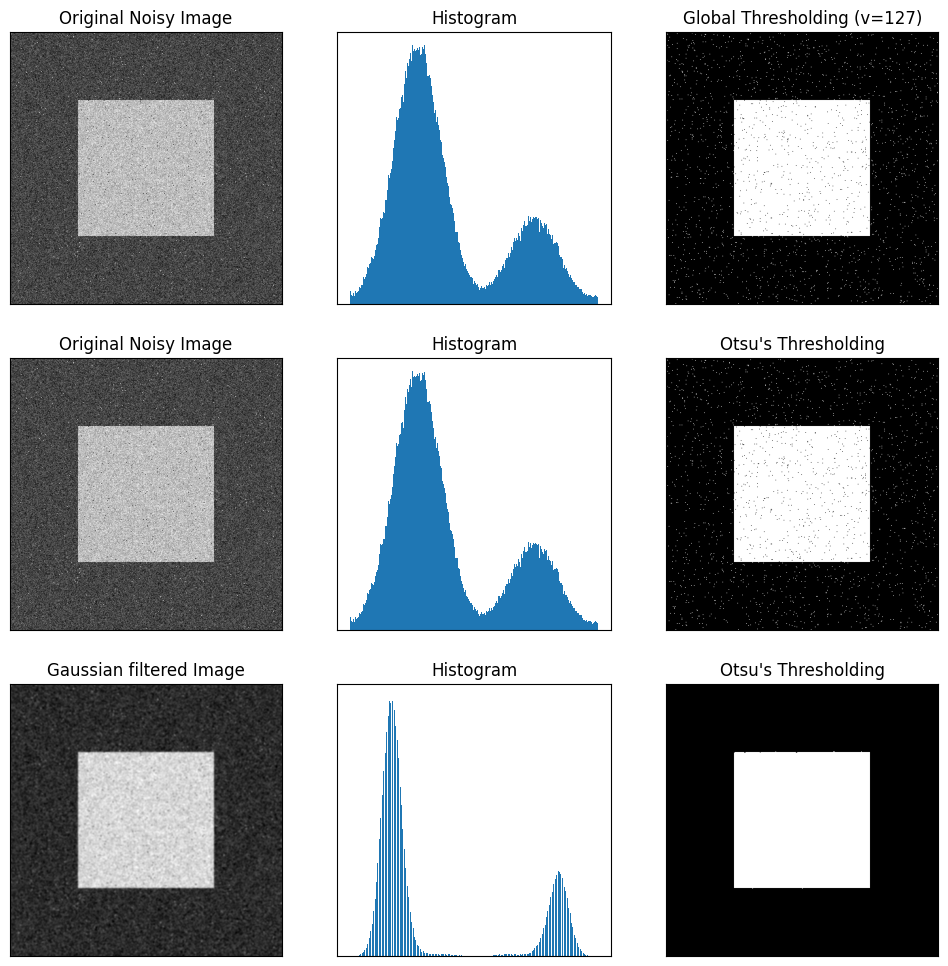

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = imn
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

fig, ax = plt.subplots(3,3, figsize=(12,12))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

### Implementation of Otsu's Algorithm

In [8]:
img = imn
blur = cv.GaussianBlur(img,(5,5),0)
# find normalized_histogram, and its cumulative distribution function
hist = cv.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.sum()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    if q1 < 1.e-6 or q2 < 1.e-6:
        continue
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )

129 128.0


## Region Growing

Adapted  from https://stackoverflow.com/questions/43923648/region-growing-python

Seed: 78, 65 113


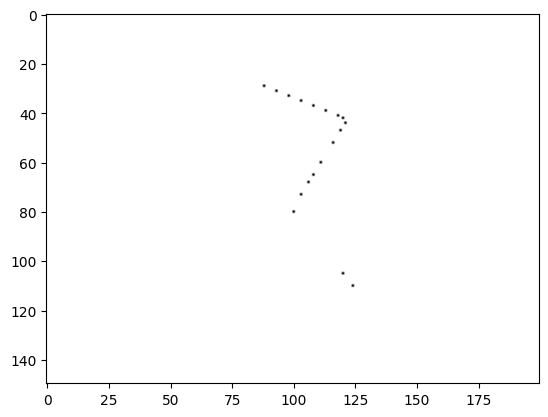

In [2]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def get8n(x, y, shape):
    out = []
    maxx = shape[0]-1
    maxy = shape[1]-1
    
    #top left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    
    #top center
    outx = x
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    
    #top right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    
    #left
    outx = min(max(x-1,0),maxx)
    outy = y
    out.append((outx,outy))
    
    #right
    outx = min(max(x+1,0),maxx)
    outy = y
    out.append((outx,outy))
    
    #bottom left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    
    #bottom center
    outx = x
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    
    #bottom right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    
    return out

def region_growing(img, seed, T):
    K = []
    outimg = np.zeros_like(img)
    img_copy = cv.cvtColor(img.copy(), cv.COLOR_GRAY2BGR) # For display only
    K.append((seed[0], seed[1]))
    processed = []
    while(len(K) > 0):
        p = K[0]
        outimg[p[0], p[1]] = 255
        Ip = img[p[0], p[1]]
        for q in get8n(p[0], p[1], img.shape):
            Iq = img[q[0], q[1]].astype(np.float32) 
            if np.abs(Iq - Ip) < T:
                outimg[q[0], q[1]] = 255
                img_copy[q[0], q[1], 2] = min(255, Iq + 100) # For display only
                if not q in processed:
                    K.append(q)
                processed.append(q)
        K.pop(0)
        cv.imshow("Progress",img_copy)
        cv.waitKey(1)
    return outimg

def on_mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print( 'Seed: ' + str(x) + ', ' + str(y), image[y,x])
        clicks.append((y,x))
        
clicks = []
image = cv.imread('./images/shadedobj.png', cv.IMREAD_REDUCED_GRAYSCALE_4)
cv.namedWindow('Input')
cv.setMouseCallback('Input', on_mouse, 0, )
cv.imshow('Input', image)
cv.waitKey()
cv.destroyAllWindows()
seed = clicks[-1]
T = 10 # No leaks
T = 25
out = region_growing(image, seed, T)
cv.imshow('Region Growing', out)
cv.waitKey()
cv.destroyAllWindows()
plt.imshow(out, cmap='gray')

# K-Means Clustering Based Segmentation

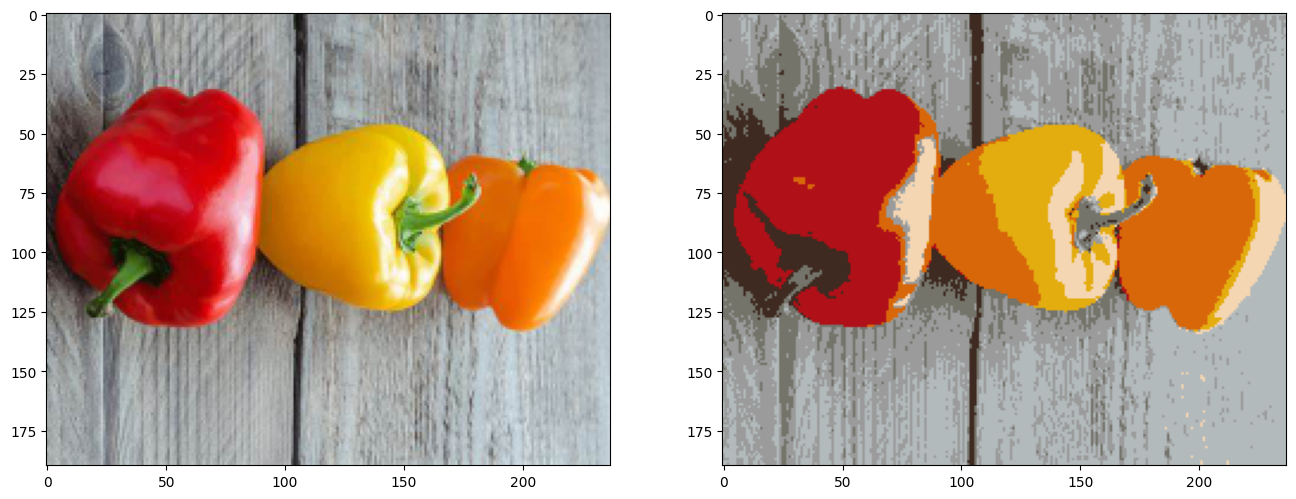

In [33]:
# K-Means Clustering Based Segmentation
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('./images/peppers_three.jpg', cv.IMREAD_REDUCED_COLOR_2)
assert img is not None


# Convert to float and reshape for kmeans function
imf = img.astype(np.float32)

pixels = imf.reshape((-1,3))
# Run 10 iterations of kmeans
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
_, labels, centers = cv.kmeans(pixels, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
# Convert back to 8 bit values
centers = np.uint8(centers)
segmented = centers[labels.flatten()]
segmented = segmented.reshape(imf.shape)
# Display
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].imshow(segmented[:,:,::-1])






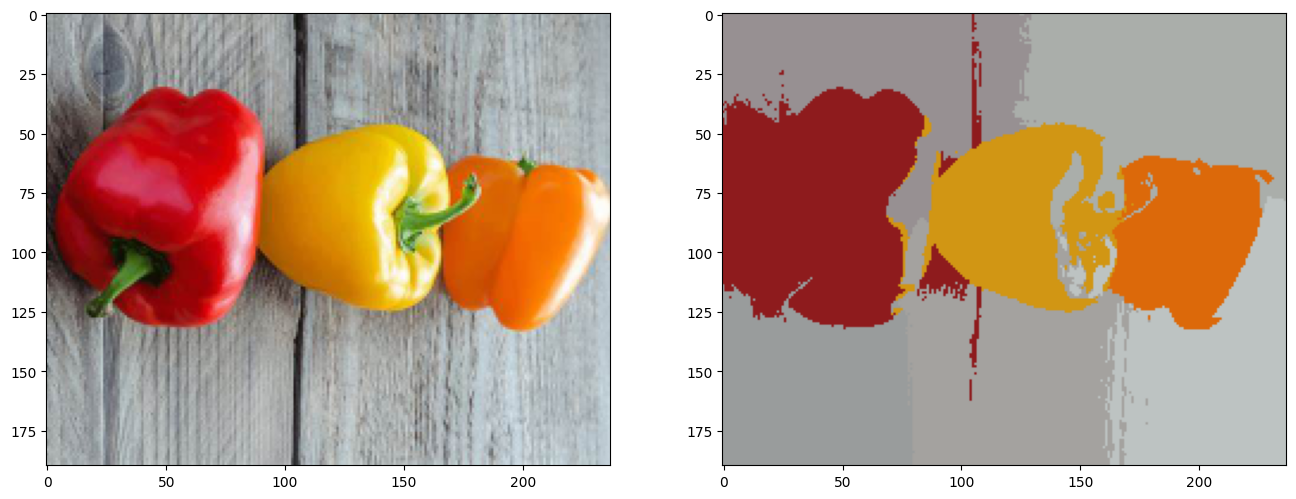

In [35]:
# K-Means Clustering Based Segmentation
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('./images/peppers_three.jpg', cv.IMREAD_REDUCED_COLOR_2)
assert img is not None


# Convert to float and reshape for kmeans function
imf = img.astype(np.float32)
# Append ot image x- and y coordinates to each pixel value
x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
spatial_weight = 2.
x = x.astype(np.float32)*spatial_weight
y = y.astype(np.float32)*spatial_weight

pixels = imf.reshape((-1,3))
# Concatenate
pixels = np.concatenate((pixels, x.reshape((-1,1))), axis=1)
pixels = np.concatenate((pixels, y.reshape((-1,1))), axis=1)
# Run 10 iterations of kmeans
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
_, labels, centers = cv.kmeans(pixels, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
# Convert back to 8 bit values
centers = np.uint8(centers)
centers = centers[:,:3]
segmented = centers[labels.flatten()]
segmented = segmented.reshape(imf.shape)
# Display
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].imshow(segmented[:,:,::-1])


In [39]:
import cv2 as cv
import numpy as np

# Read the input image
image = cv.imread('./images/peppers.jpg', cv.IMREAD_REDUCED_COLOR_2)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply thresholding to obtain binary image
_, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Perform morphological operations to clean the binary image
kernel = np.ones((3,3), np.uint8)
sure_bg = cv.dilate(thresh, kernel, iterations=3)

# Distance transform to find sure foreground
dist_transform = cv.distanceTransform(thresh, cv.DIST_L2, 5)
_, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Find the unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

# Marker labeling for watershed
_, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that unknown region is marked as 1
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed algorithm
markers = cv.watershed(image, markers)
image[markers == -1] = [0, 0, 255]  # Mark watershed boundary in red

# Display the result
cv.imshow('Watershed Segmentation', image)
cv.waitKey(0)
cv.destroyAllWindows()

NameError: name 'cv2' is not defined

: 